In [76]:
import numpy as np
import matplotlib.pyplot as plt 
from functools import reduce
from qulacs import QuantumState, QuantumCircuit
from qulacsvis import circuit_drawer


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.cm import ScalarMappable
from cycler import cycler
mpl.rcParams.update({'font.size': 18})

plt.rcParams['axes.axisbelow'] = True

## seed of random number
random_seed = 42
## initialization of random number generator
np.random.seed(random_seed)

from sklearn.model_selection import train_test_split


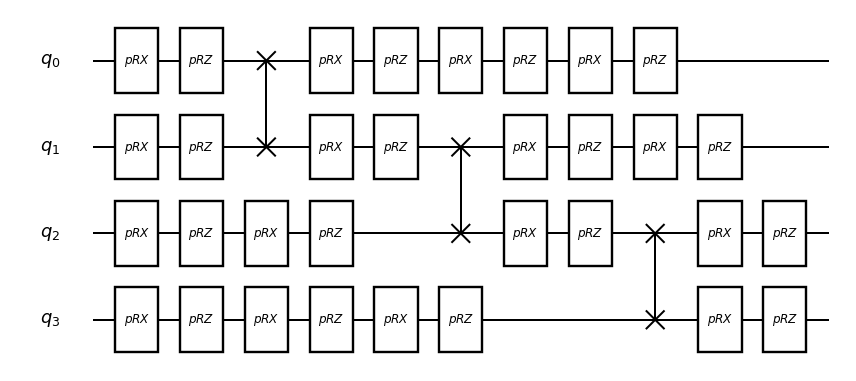

In [77]:
nqubit = 4
cdepth = 3

from qulacs import ParametricQuantumCircuit

qc = ParametricQuantumCircuit(nqubit)

#qc.add_X_gate(0)
for d in range(cdepth):
    #U_out.add_gate(time_evol_gate)
    
    for i in range(nqubit):
        angle = np.random.rand()*2*np.pi
        qc.add_parametric_RX_gate(i,angle)
        angle = np.random.rand()*2*np.pi
        qc.add_parametric_RZ_gate(i,angle)
    qc.add_SWAP_gate(d,d+1)
for i in range(nqubit):
        angle = np.random.rand()*2*np.pi
        qc.add_parametric_RX_gate(i,angle)
        angle = np.random.rand()*2*np.pi
        qc.add_parametric_RZ_gate(i,angle)

circuit_drawer(qc,'mpl')

In [78]:
# Acceder a valores de los parámetros
parameter_count = qc.get_parameter_count()
theta_init = [qc.get_parameter(ind) for ind in range(parameter_count)]
print(f'Initial {parameter_count} parameters: {theta_init}')

Initial 32 parameters: [2.353304971691044, 5.9735141613602165, 4.599253580133889, 3.761482191925223, 0.980294029274052, 0.9801424781769557, 0.3649500985631483, 5.442345232562516, 3.776917009710014, 4.448951217224888, 0.12933619211510794, 6.094123332392967, 5.230391369746984, 1.3341659803533248, 1.1424399624340646, 1.152364521581569, 1.9116103907867292, 3.297141901079666, 2.713990594641554, 1.8298466547148808, 3.844385118274953, 0.8764657756906659, 1.8355989632476268, 2.3019193508941536, 2.865572223878106, 4.933406064175189, 1.2545873742863833, 3.23103026788615, 3.7222505148331146, 0.29185655071471744, 3.8173168869197154, 1.0714346684716647]


In [79]:
from qulacs.state import inner_product

state1 = QuantumState(nqubit)
nstate = QuantumState(nqubit)
state1.set_computational_basis(0b0001)
nstate.set_computational_basis(0b1000)
print(inner_product(state1,nstate))


0j


In [80]:


# Create observable Z_0
from qulacs import Observable

z0 = Observable(nqubit)
z0.add_operator(1.,'Z 0')

z1 = Observable(nqubit)
z1.add_operator(1.,'Z 1')

z2 = Observable(nqubit)
z2.add_operator(1.,'Z 2')

z3 = Observable(nqubit)
z3.add_operator(1.,'Z 3')

# Función que predice el valor y(x_i,theta) del modelo a partir del input x_i
def qcl_pred(qc):
    #.set_zero_state()
    state = QuantumState(nqubit)
    state.set_computational_basis(0b0001)
    # Calculate output state
    calcstate = qc.update_quantum_state(state)
    # Output of the model
    res =  calcstate   #[z0.get_expectation_value(state),z1.get_expectation_value(state),z2.get_expectation_value(state),z3.get_expectation_value(state)]
    return res

# Function that updates parameter theta
def set_U_out(theta):

    global U_out

    parameter_count = qc.get_parameter_count()

    for i in range(parameter_count):
        qc.set_parameter(i, theta[i])

# Cálculo de función costo
def cost_func(theta):
    '''
    theta: ndarray of length c_depth * nqubit * 3
    '''    
    # actualizar el parámetros theta de U_out
    # U_out es una variable global
    
    set_U_out(theta)

    initial_state = QuantumState(nqubit)
    initial_state.set_computational_basis(0b0001)
    print('init', initial_state.get_vector())

    qc.update_quantum_state(initial_state)
    print('mid: ', initial_state.get_vector())

    # calcular predicciones para el conjunto de entrenamiento
    #y_pred = qcl_pred(qc)
    #state1 = QuantumState(nqubit)
    nstate = QuantumState(nqubit)

    #state1 = qcl_pred(qc)
    nstate.set_computational_basis(0b1000)
    print('final:',  nstate.get_vector())
    print(inner_product(initial_state,nstate))
    # Error cuadrático medio 
    L = 1-np.abs(inner_product(initial_state,nstate))  #-y_pred[3] + y_pred[0] + y_pred[1] + y_pred[2]
    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = theta
    cost_history_dict["cost_history"].append(L)

    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {L}]")

    return L


init [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
mid:  [ 0.31359421-0.37151857j -0.10264536-0.05630149j -0.11664856+0.44566921j
  0.11075536+0.00627972j  0.22071011+0.31284042j  0.06331536-0.06701365j
 -0.31638183-0.1775237j  -0.02681374+0.08314231j  0.23148071-0.13208301j
 -0.04221484-0.04833826j -0.14409425+0.20739358j  0.05582331+0.02412075j
  0.05460151+0.20265023j  0.04522827-0.02255178j -0.12936611-0.15104411j
 -0.02948214+0.03773768j]
final: [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
(0.23148070587074276+0.1320830145757473j)
Iters. done: 1 [Current cost: 0.7334868860077719]
init [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
mid:  [ 0.161349  -0.38402824j -0.09833775-0.01977005j  0.01866324+0.39426227j
  0.09216885-0.02320681j  0.26052302+0.19932356j  0.03462304-0.0709973

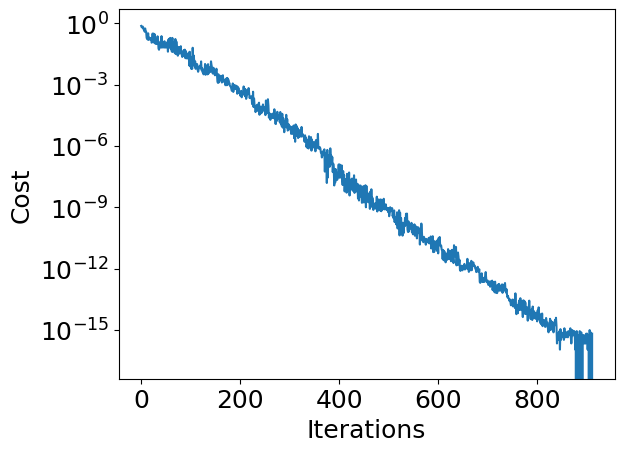

In [81]:
from scipy.optimize import minimize
cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}
result = minimize(cost_func, theta_init, method='cobyla', tol=1e-8)
print(result.message)
print(result.fun)
print(result.x/np.pi)

all(cost_history_dict["prev_vector"] == result.x)
cost_history_dict["iters"] == result.nfev
fig, ax = plt.subplots()
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"])
ax.axhline(y=0, color='r', linestyle='--', label="Energía objetivo (-1.84)")
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_yscale("log")
plt.draw()

In [82]:
parameter_count = qc.get_parameter_count()
theta_fin = [qc.get_parameter(ind) for ind in range(parameter_count)]
print(f'Final {parameter_count} parameters: {theta_fin}')


Final 32 parameters: [2.8290996412738414, 7.546990209653504, 4.712192420861499, 3.6639239965682813, 1.6458033030739843, 0.8593205857045233, 1.2760447340093106, 5.787652145212863, 4.792106562460141, 4.744926305425541, 1.297284248208561, 6.899683853113078, 6.421909356279319, 1.2290981779059944, 2.9020179150223173, 1.0750020019634081, 2.1180867441053732, 3.2521205382033984, 2.5522660807191913, 1.934135086189, 4.753300228784993, 0.7284022909688667, 1.7695001861052762, 2.0735051339912314, 2.6409527792252128, 5.062227168498883, 1.144077074698054, 4.756989867762667, 4.764433020181451, 0.12183585822025716, 3.5692958743065955, 1.7569216773416905]


In [83]:
state = QuantumState(nqubit)
state.set_zero_state()
# Calculate output state
print(state.get_vector())
set_U_out(result.x)
circuit_drawer(qc,'mpl')
qc.update_quantum_state(state)
print(state.get_vector())
z0 = Observable(nqubit)
z0.add_operator(1.,'Z 0')

z1 = Observable(nqubit)
z1.add_operator(1.,'Z 1')

z2 = Observable(nqubit)
z2.add_operator(1.,'Z 2')

z3 = Observable(nqubit)
z3.add_operator(1.,'Z 3')

print(z0.get_expectation_value(state))
print(z1.get_expectation_value(state))  
print(z2.get_expectation_value(state))
print(z3.get_expectation_value(state))


[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[ 2.10428798e-01+9.77609186e-01j  5.80804122e-09+1.00822917e-08j
 -1.40220254e-08-1.51130228e-08j -1.66083735e-16-1.48764499e-16j
  1.35522114e-08-7.63505937e-09j  1.29543899e-16-1.00449951e-16j
 -2.09062869e-16+1.95954400e-16j  5.26513278e-17+8.60665917e-18j
  5.40564974e-09+7.66937965e-09j  6.56922526e-17+9.57697262e-17j
 -1.17767897e-16-1.35239525e-16j  2.53963079e-17-9.78485264e-18j
  9.30362529e-17-1.15608928e-16j  4.91776441e-18-1.22291088e-17j
  3.68995974e-18+3.29351808e-17j -2.59554457e-17+1.96703870e-17j]
0.9999999999999989
0.9999999999999982
0.9999999999999987
0.9999999999999989
